<a href="https://colab.research.google.com/github/kinaya18/Deep-Learning/blob/main/Week-7/Deep_RNN_DeteksiSarkasme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Aizar Yazid / 1103223097

## Import Library

In [15]:
import json
import keras_tuner as kt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Preprocessing

In [16]:
data = []
with open('DeteksiSarkasme.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [17]:
sentences = [item['headline'] for item in data]
labels = [item['is_sarcastic'] for item in data]

In [18]:
max_len = 100
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences)
X = tokenizer.texts_to_sequences(sentences)
X = pad_sequences(X, maxlen=max_len)

In [19]:
y = np.array(labels)
X_train_pad, X_test_pad, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Grid Search for Hyperparameter Tuning

In [20]:
lstm_units = [64, 128, 256]
dense_units = [64, 128]
dropout_rates = [0.2, 0.3, 0.5]
learning_rates = [1e-3, 1e-4, 1e-5]

In [21]:
best_accuracy = 0
best_params = {}

In [22]:
for lstm_unit in lstm_units:
    for dense_unit in dense_units:
        for dropout_rate in dropout_rates:
            for learning_rate in learning_rates:
                print(f"Training with: LSTM Units={lstm_unit}, Dense Units={dense_unit}, Dropout={dropout_rate}, Learning Rate={learning_rate}")

                # 7. Membuat dan melatih model dengan hyperparameter yang dipilih
                model = Sequential()
                model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_len))
                model.add(LSTM(lstm_unit, return_sequences=True))
                model.add(Dropout(dropout_rate))
                model.add(LSTM(lstm_unit))
                model.add(Dropout(dropout_rate))
                model.add(Dense(dense_unit, activation='relu'))
                model.add(Dropout(dropout_rate))
                model.add(Dense(1, activation='sigmoid'))

Training with: LSTM Units=64, Dense Units=64, Dropout=0.2, Learning Rate=0.001
Training with: LSTM Units=64, Dense Units=64, Dropout=0.2, Learning Rate=0.0001
Training with: LSTM Units=64, Dense Units=64, Dropout=0.2, Learning Rate=1e-05
Training with: LSTM Units=64, Dense Units=64, Dropout=0.3, Learning Rate=0.001
Training with: LSTM Units=64, Dense Units=64, Dropout=0.3, Learning Rate=0.0001
Training with: LSTM Units=64, Dense Units=64, Dropout=0.3, Learning Rate=1e-05
Training with: LSTM Units=64, Dense Units=64, Dropout=0.5, Learning Rate=0.001
Training with: LSTM Units=64, Dense Units=64, Dropout=0.5, Learning Rate=0.0001
Training with: LSTM Units=64, Dense Units=64, Dropout=0.5, Learning Rate=1e-05
Training with: LSTM Units=64, Dense Units=128, Dropout=0.2, Learning Rate=0.001
Training with: LSTM Units=64, Dense Units=128, Dropout=0.2, Learning Rate=0.0001
Training with: LSTM Units=64, Dense Units=128, Dropout=0.2, Learning Rate=1e-05
Training with: LSTM Units=64, Dense Units=128

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training with: LSTM Units=64, Dense Units=128, Dropout=0.3, Learning Rate=1e-05
Training with: LSTM Units=64, Dense Units=128, Dropout=0.5, Learning Rate=0.001
Training with: LSTM Units=64, Dense Units=128, Dropout=0.5, Learning Rate=0.0001
Training with: LSTM Units=64, Dense Units=128, Dropout=0.5, Learning Rate=1e-05
Training with: LSTM Units=128, Dense Units=64, Dropout=0.2, Learning Rate=0.001
Training with: LSTM Units=128, Dense Units=64, Dropout=0.2, Learning Rate=0.0001
Training with: LSTM Units=128, Dense Units=64, Dropout=0.2, Learning Rate=1e-05
Training with: LSTM Units=128, Dense Units=64, Dropout=0.3, Learning Rate=0.001
Training with: LSTM Units=128, Dense Units=64, Dropout=0.3, Learning Rate=0.0001
Training with: LSTM Units=128, Dense Units=64, Dropout=0.3, Learning Rate=1e-05
Training with: LSTM Units=128, Dense Units=64, Dropout=0.5, Learning Rate=0.001
Training with: LSTM Units=128, Dense Units=64, Dropout=0.5, Learning Rate=0.0001
Training with: LSTM Units=128, Dense

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                              loss='binary_crossentropy',
                              metrics=['accuracy'])

In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

## Training Model

In [25]:
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test),
    callbacks=[early_stopping],
    verbose=0
)

In [26]:
model.summary()

Model: "sequential_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_107 (Embedding)       │ (None, 100, 100)       │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_214 (LSTM)                 │ (None, 100, 256)       │       365,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_321 (Dropout)           │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_215 (LSTM)                 │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_322 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_323 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,271,717 (16.30 MB)

 Trainable params: 1,423,905 (5.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,847,812 (10.86 MB)

## Model Evaluation

In [27]:
y_pred = (model.predict(X_test_pad) > 0.5)
test_accuracy = accuracy_score(y_test, y_pred)

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [28]:
print(f"Akurasi Testing Set: {test_accuracy * 100:.2f}%")

Akurasi Testing Set: 82.53%


In [30]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.8253
Precision: 0.7649
Recall: 0.8696
F1 Score: 0.8139
ROC AUC: 0.8301


In [31]:
if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_params = {
                        'lstm_units': lstm_unit,
                        'dense_units': dense_unit,
                        'dropout_rate': dropout_rate,
                        'learning_rate': learning_rate
                    }

In [32]:
print("\nBest Hyperparameters Found:")
print(best_params)
print(f"Best Test Accuracy: {best_accuracy * 100:.2f}%")


Best Hyperparameters Found:
{'lstm_units': 256, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 1e-05}
Best Test Accuracy: 82.53%


In [33]:
train_accuracy = accuracy_score(y_train, (model.predict(X_train_pad) > 0.5))
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi pada Training Set: {train_accuracy * 100:.2f}%')
print(f'Akurasi pada Testing Set: {test_accuracy * 100:.2f}%')

668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
Akurasi pada Training Set: 85.49%
Akurasi pada Testing Set: 82.53%


## Model Visualization

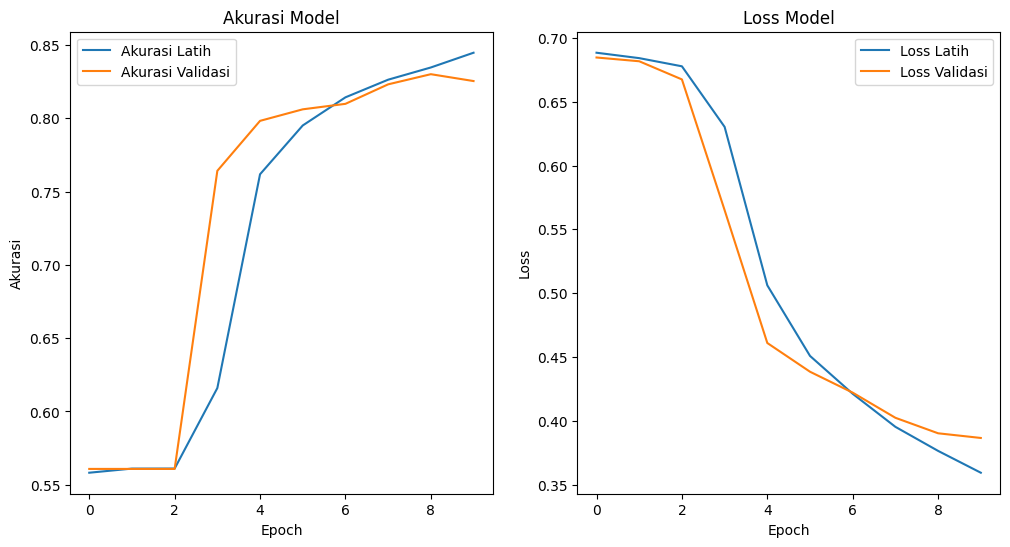

In [34]:
plt.figure(figsize=(12, 6))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Latih')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

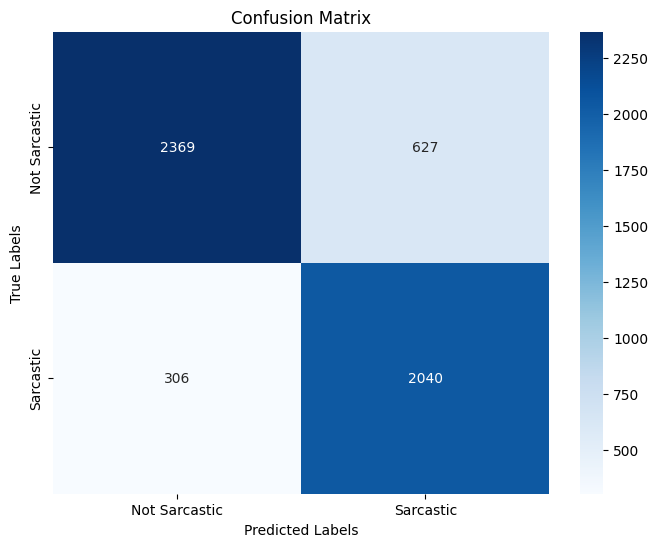

In [35]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Sarcastic", "Sarcastic"], yticklabels=["Not Sarcastic", "Sarcastic"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


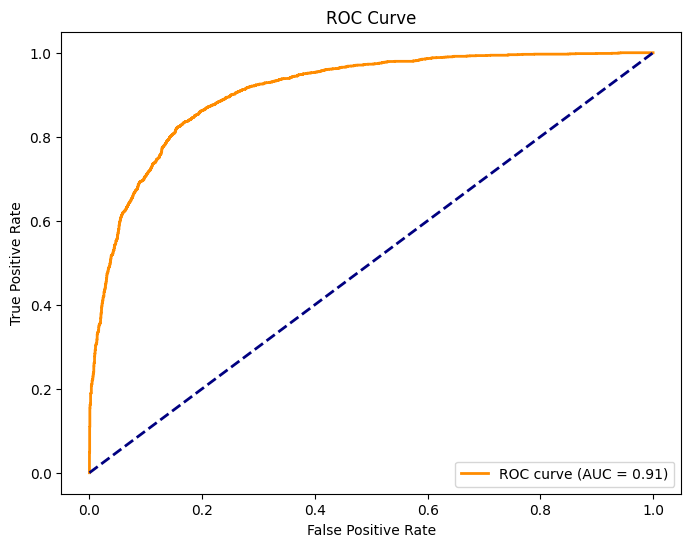

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test_pad))
roc_auc = roc_auc_score(y_test, model.predict(X_test_pad))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()